In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
my_df = pd.read_csv('http://bit.ly/w-data') 
my_df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#knowing more about dataset like about null values, number of rows & columns
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#statistical analysis of data
my_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


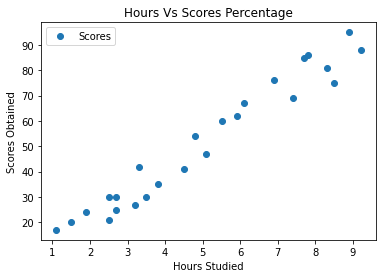

In [5]:
#plotting the data
my_df.plot(x='Hours' , y = 'Scores' , style= 'o')
plt.title('Hours Vs Scores Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

In [7]:
#splitting data for modeling
x = my_df.iloc[: , :-1].values
y = my_df.iloc[: , 1].values

In [8]:
#splitting data in training and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 0)

In [9]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_train , y_train)

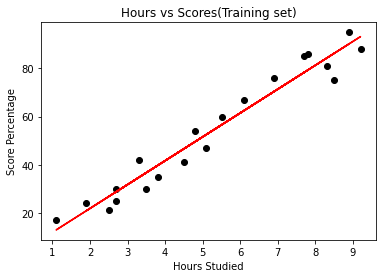

In [10]:
#visualizing training set 
plt.scatter(x_train , y_train , color = 'black')
plt.plot(x_train , regressor.predict(x_train) , color = 'red')
plt.title('Hours vs Scores(Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.show()

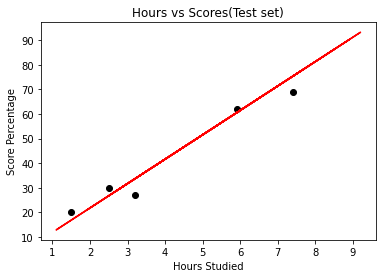

In [11]:
#visualizing test set 
plt.scatter(x_test , y_test , color = 'black')
plt.plot(x_train , regressor.predict(x_train) , color = 'red')
plt.title('Hours vs Scores(Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score Percentage')
plt.show()

In [12]:
predictor = regressor.predict(x_test)

In [13]:
df = pd.DataFrame({ 'actual' : y_test , 'predictor' : predictor})
df

,actual,predictor
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#predicting scores of student studying for 9.25hrs
hours = 9.25
pred = regressor.predict(np.array([hours]).reshape(-1,1))
print("Hours  = {} ".format(hours))                         
print("Predicted Score  = {} ".format(pred[0]))

Hours  = 9.25 
Predicted Score  = 93.69173248737539 


In [17]:
#evaluating the model
from sklearn import metrics
print ('Mean Absolute Error :' , metrics.mean_absolute_error(y_test , predictor))

Mean Absolute Error : 4.183859899002982
